In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import LSTM,Dense, Input, Embedding, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# loading the training data
train = pd.read_csv(r'/content/train.csv')

In [4]:
train.shape

(1306122, 3)

In [5]:
# Reading word embeddings from a GloVe file and storing them in a dictionary called 'embedding_index'
embedding_index={}
f = open(r"/content/glove.6B.100d.txt", encoding='utf-8')
for line in f:
  values=line.split()
  word = values[0]
  wts = np.asarray(values[-100:],dtype='float32')
  embedding_index[word]=wts
f.close()

In [6]:
# To get word vectors from the GloVe file associated with the word:'today'
embedding_index['today']

array([-0.19939  ,  0.37846  ,  0.52093  ,  0.28347  , -0.1898   ,
       -0.20947  , -0.23286  ,  0.14185  , -0.034916 , -0.36006  ,
       -0.0046717, -0.25207  ,  0.31364  , -0.34879  ,  0.032268 ,
       -0.45078  ,  0.011292 ,  0.090903 , -0.62866  ,  0.0079579,
        0.28065  ,  0.34158  , -0.25593  ,  0.11521  ,  0.10571  ,
       -0.45827  ,  0.32193  , -0.29186  ,  0.11443  ,  0.17972  ,
       -0.31633  ,  0.40085  , -0.24405  , -0.050205 ,  0.16485  ,
        0.5001   ,  0.11756  ,  0.043875 , -0.060235 , -0.66571  ,
       -0.40628  , -0.21691  ,  0.068156 , -0.38058  , -0.4512   ,
       -0.26966  ,  0.45961  , -0.23446  , -0.26416  , -1.1617   ,
        0.18417  , -0.53088  ,  0.54179  ,  0.78295  , -0.54864  ,
       -2.0634   , -0.63427  ,  0.095073 ,  1.9649   ,  0.47031  ,
       -0.54401  ,  0.73015  , -0.34352  , -0.43033  ,  0.27555  ,
        0.025185 ,  0.35053  ,  0.46295  ,  0.40837  , -0.011836 ,
        0.34553  , -0.17297  , -0.13765  , -0.23182  ,  0.3898

In [7]:
from sklearn.model_selection import train_test_split
Train_train, Test_test=train_test_split(train, test_size=0.25)

In [8]:
x_train=Train_train['question_text']
y_train=Train_train['target']
x_test=Test_test['question_text']
y_test=Test_test['target']

In [9]:
# Adds a new column to dataframe 'train' with the name:'length'
train['length']=[len(x) for x in train['question_text']]

In [10]:
# To get the maximum and minimum values in the 'length' column of the DataFrame train
train['length'].max(),train['length'].min()

(1017, 1)

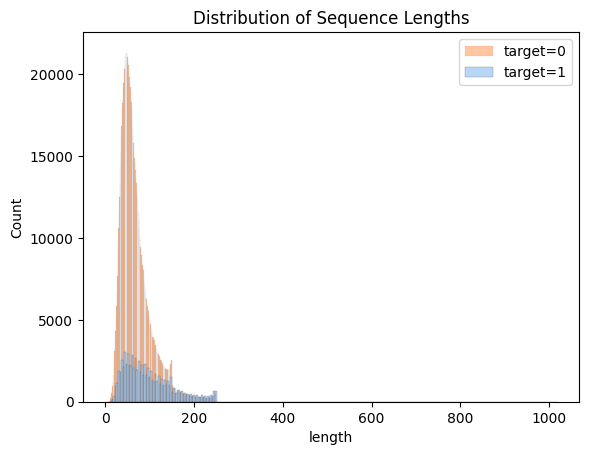

In [11]:
# Create a histogram of the distribution of sequence lengths in the train DataFrame, with separate histograms for rows where the 'target' column is equal to 0 and 1
sns.histplot(train.loc[train['target'] == 0, 'length'], kde=False, label='target=0', color=sns.color_palette('pastel')[1])
sns.histplot(train.loc[train['target'] == 1, 'length'], kde=False, label='target=1', color=sns.color_palette('pastel')[0])
plt.title('Distribution of Sequence Lengths')
plt.legend()
plt.show()

In [12]:
max_len=251
# To create a Tokenizer object named 'Tk' for tokenizing text data.
Tk=Tokenizer(char_level=False,split=' ')
# Tokenizer learns the vocabulary and tokenizes the text in x_train
Tk.fit_on_texts(x_train)

In [13]:
# To calculate the number of unique words (or tokens) in your text data, which is the vocabulary size of the tokenizer('Tk')
vocab_size=len(Tk.word_index)

In [14]:
vocab_size

189134

In [15]:
# To convert the text sequences in your training dataset x_train into sequences of integers
seq_train=Tk.texts_to_sequences(x_train)
# To convert the text sequences in your test dataset x_test into a matrix format.
seq_test=Tk.texts_to_matrix(x_test)

In [16]:
# Padding the x_train and x_test files to the max. length taken
seq_train_matrix=sequence.pad_sequences(seq_train,maxlen=max_len)
seq_test_matrix=sequence.pad_sequences(seq_test,maxlen=max_len)

In [17]:
# To initialize the embedding layer in a deep learning model with pre-trained word embeddings.
embedding_matrix=np.zeros((vocab_size+1,100))

In [18]:
# To fill the embedding_matrix with pre-trained word vectors obtained from the embedding_index dictionary
for word,i in Tk.word_index.items():
  # To retrieve the pre-trained word vector for the current word word from the embedding_index dictionary.
  embed_vector=embedding_index.get(word)

  if embed_vector is not None:
    embedding_matrix[i]=embed_vector
  if embed_vector is None:
    print(word)

Streaming output truncated to the last 5000 lines.
cetyl
accept's
‘peace’
‘piss’
dv4
everyones'
rrod
serquel
dovy
rogham
handhsake
kroos's
ramos'
anaimdi
on quora
gaal's
kanjimasu
honto
yokatta
naranaikedo
“artificial
streetbyte
“twenty
pilots”
poclain
coo2
licoo2
s07
distante
the us
lion’s
vigaina
airdna
candium
degence
pedogogical
latuba
7month
dialated
perganet
nepel
homesexual
'anyway'
'anyways'
lm324
stilleto
fetisize
3662
hybradisation
paypoint
legaledge
porinju
veliyath
修身
修身養性
emojigs
sengottaiyan
raanjhana
'centrists'
vinglish
keot
dufus
konkans
programmer's
briliant
cooporation
coties
mercutio's
cardic
umbrical
hetrogenous
amon's
macerator
6785
fofo
projrect
temble
dimble
simbly
''read''
effecrivly
guit
yemen's
“floating”
zanocin
larcheveque
twowill
'integration
disorder'
dipressive
lotory
pshychologists
tiling's
with72
makerbot
recrefree
heberden’s
ffxiv
matches'
jenre
modichods
rru
fumblerooski
afferbeck
gookie
letfap
wwf's
jaydess
cerelle
cheapy
antipsychosis
bhakht
sequel

In [19]:
seq_train_matrix.shape, y_train.shape, seq_test_matrix.shape,y_test.shape

((979591, 251), (979591,), (326531, 251), (326531,))

In [25]:
#reducing the test & train data size
seq_train_matrix=seq_train_matrix[0:10000]
y_train=y_train[0:10000]
seq_test_matrix=seq_test_matrix[0:3500]
y_test=y_test[0:3500]

In [26]:
seq_train_matrix.shape, y_train.shape, seq_test_matrix.shape,y_test.shape

((10000, 251), (10000,), (3500, 251), (3500,))

In [30]:
# Defining a neural network model using Keras
inputs=Input(name='question_text',shape=[max_len])
embed=Embedding(vocab_size+1,100,input_length=max_len,
                weights=[embedding_matrix],trainable=False)(inputs)
# The use_cudnn argument to stop using cuDNN
lstm_layer=LSTM(50, use_cudnn=False)(embed)

dense1=Dense(10,activation='relu')(lstm_layer)
dr1=Dropout(0.2)(dense1)

final_layer=Dense(1,activation='sigmoid')(dr1)

model=Model(inputs=inputs,outputs=final_layer)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ question_text (InputLayer)           │ (None, 251)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 251, 100)            │      18,913,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,944,221 (72.27 MB)

 Trainable params: 30,721 (120.00 KB)

 Non-trainable params: 18,913,500 (72.15 MB)

In [31]:
# Compiling and training your Keras model using the Adam optimizer and binary cross-entropy loss function.
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
model.fit(seq_train_matrix, y_train, validation_data=(seq_test_matrix,y_test),
          epochs=10, batch_size=128)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9396 - loss: 0.2056 - val_accuracy: 0.9363 - val_loss: 0.2754
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9381 - loss: 0.1711 - val_accuracy: 0.9363 - val_loss: 0.2827
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9386 - loss: 0.1666 - val_accuracy: 0.9363 - val_loss: 0.2992
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9458 - loss: 0.1604 - val_accuracy: 0.9363 - val_loss: 0.2855
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9406 - loss: 0.1521 - val_accuracy: 0.9363 - val_loss: 0.2779
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9494 - loss: 0.1428 - val_accuracy: 0.9363 - val_loss: 0.2760
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9518 - loss: 0.1389 - val_accuracy: 0.9363 - val_loss: 0.2953
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9527 - loss: 0.1346 - val_accuracy: 0.9363 - v

In [34]:
model.save('/content/Project3.h5')

In [35]:
model.save('/content/Project3.keras')
